# Image Transformation Techniques

In this notebook, we will explore various techniques for transforming image data. These techniques are crucial for enhancing the dataset through data augmentation and improving image quality through filtering and denoising. The techniques we will cover include data augmentation (rotation, translation, flip, zoom), filtering and denoising (smoothing filters, edge detection), and color masks.

## 1. Data Augmentation

Data augmentation involves generating new training samples from existing ones through various transformations. This helps in increasing the diversity of the dataset, improving the robustness of machine learning models.

- **Rotation**: Rotating the image by a specified angle.
- **Translation**: Shifting the image along the x and y axes.
- **Flip**: Flipping the image horizontally or vertically.
- **Zoom**: Zooming into the image by a specified factor.

## 2. Filtering and Denoising

Filtering and denoising techniques are used to improve image quality by reducing noise and enhancing important features.

- **Smoothing Filters**: Applying filters to smooth the image and reduce noise.
- **Edge Detection**: Detecting edges in the image to highlight important structural features.

## 3. Color Masks

Color masks are used to highlight or isolate specific features in an image based on their color. This is useful for tasks such as object detection, segmentation, and image enhancement.

- **Creating a Color Mask**: Defining a range of colors to isolate.
- **Applying a Color Mask**: Using the mask to highlight or alter specific parts of the image.


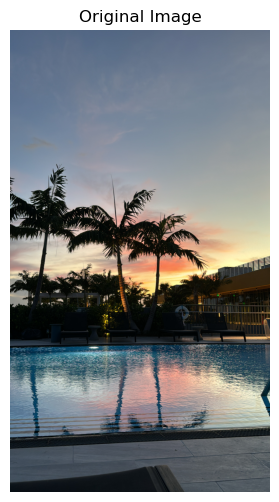

In [8]:
# Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to display images
def display_image(image, title='Image', cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load an example image
image_path = 'image.jpg'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for correct color display

# Display original image
display_image(image, title='Original Image')

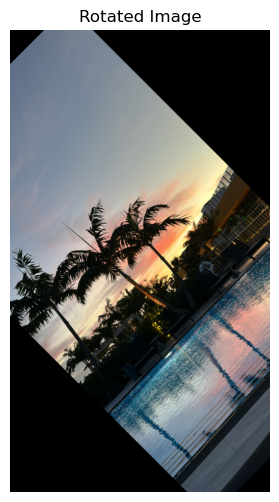

In [9]:
# Rotation
angle = 45  # rotate by 45 degrees
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image, M, (w, h))
display_image(rotated_image, title='Rotated Image')

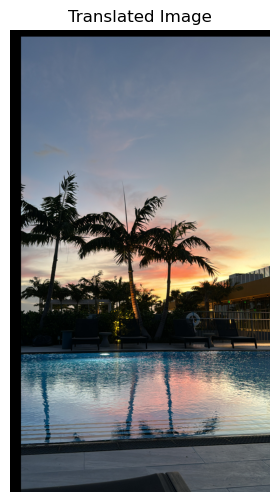

In [10]:
# Translation
shift_x, shift_y = 50, 30  # shift by 50 pixels right and 30 pixels down
M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
translated_image = cv2.warpAffine(image, M, (w, h))
display_image(translated_image, title='Translated Image')


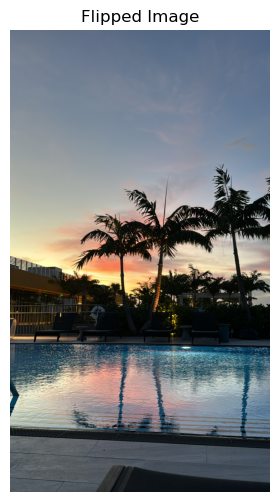

In [11]:
# Flip
flipped_image = cv2.flip(image, 1)  # horizontal flip
display_image(flipped_image, title='Flipped Image')


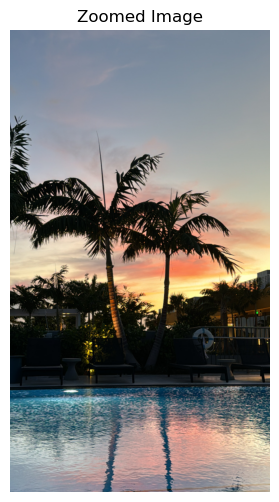

In [12]:
# Zoom
zoom_factor = 1.5
(h, w) = image.shape[:2]
center_x, center_y = w // 2, h // 2

# Coordinates of the zoomed area
x1 = int(center_x - w / (2 * zoom_factor))
x2 = int(center_x + w / (2 * zoom_factor))
y1 = int(center_y - h / (2 * zoom_factor))
y2 = int(center_y + h / (2 * zoom_factor))

zoomed_image = image[y1:y2, x1:x2]
zoomed_image = cv2.resize(zoomed_image, (w, h))
display_image(zoomed_image, title='Zoomed Image')


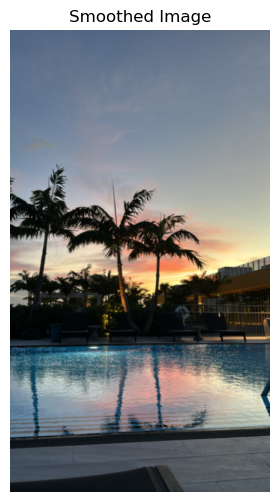

In [13]:
# Smoothing filter
smoothed_image = cv2.GaussianBlur(image, (9, 9), 0)
display_image(smoothed_image, title='Smoothed Image')


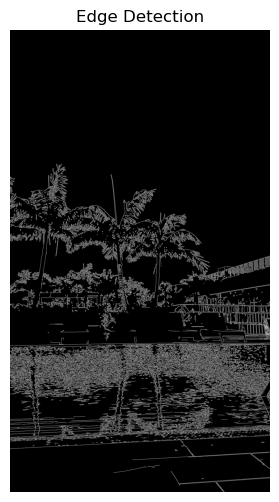

In [14]:
# Edge detection
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray_image, 100, 200)
display_image(edges, title='Edge Detection', cmap='gray')


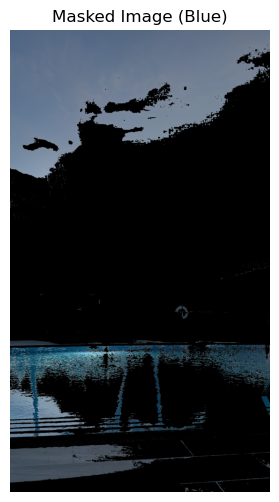

In [15]:
# Define the color range for masking (e.g., blue color range)
lower_blue = np.array([90, 50, 50], dtype=np.uint8)
upper_blue = np.array([130, 255, 255], dtype=np.uint8)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Create the mask
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Apply the mask to the image
masked_image = cv2.bitwise_and(image, image, mask=mask)
display_image(masked_image, title='Masked Image (Blue)')

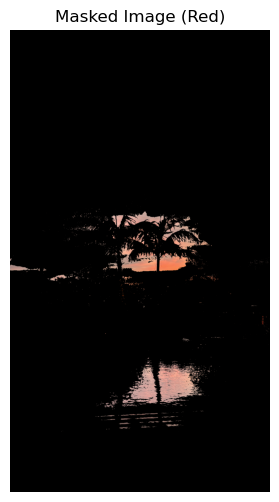

In [16]:
# Define the color range for masking (e.g., blue color range)
lower_red = np.array([0, 50, 50], dtype=np.uint8)
upper_red = np.array([10, 255, 255], dtype=np.uint8)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Create the mask
mask = cv2.inRange(hsv_image, lower_red, upper_red)

# Apply the mask to the image
masked_image = cv2.bitwise_and(image, image, mask=mask)
display_image(masked_image, title='Masked Image (Red)')